# hypotheses generation of the sales of each product at a particular store prediction project

1. **Product Placement :**
   - *Hypothesis:* The location of a product within the store influences its sales.
   - *Explanation:* Products placed at eye level, end-of-aisle displays, or near high-traffic areas may experience higher sales due to increased visibility.

2. **Brand Loyalty :**
   - *Hypothesis:* Recognizable brands outsell generic or less-known brands.
   - *Explanation:* Customers may exhibit a preference for well-established brands, impacting the sales of products associated with those brands.

3. **Product Packaging :**
   - *Hypothesis:* The design and attractiveness of product packaging affect sales.
   - *Explanation:* Appealing and informative packaging may capture customer attention and influence purchase decisions.

4. **Product Availability :**
   - *Hypothesis:* Out-of-stock products experience a drop in sales.
   - *Explanation:* Customers are likely to choose alternatives or delay purchases if the desired product is consistently out of stock.

5. **Store Layout :**
   - *Hypothesis:* The overall layout and design of the store impact the sales of specific product categories.
   - *Explanation:* Stores with well-organized layouts may facilitate easier navigation and increase the likelihood of customers discovering and purchasing certain products.

6. **Product Pricing Tier :**
   - *Hypothesis:* Sales are influenced by the pricing tier to which a product belongs (e.g., budget, mid-range, premium).
   - *Explanation:* Customers may exhibit distinct preferences for products within specific price ranges, affecting the sales distribution across different tiers.


7. **Product Demographics :**
   - *Hypothesis:* Certain products cater to specific demographic groups within the store's customer base.
   - *Explanation:* Understanding the demographic profiles of customers can help predict which products may be more popular among different segments.

8. **Store Size :**
   - *Hypothesis:* The physical size of the store impacts the variety and quantity of products sold.
   - *Explanation:* Larger stores may carry a wider selection of products, potentially influencing customer choices and sales patterns.



In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [242]:
data=pd.read_csv(r"C:\Users\oussa\Downloads\project data\Train.csv")

In [148]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
data.shape

(8523, 12)

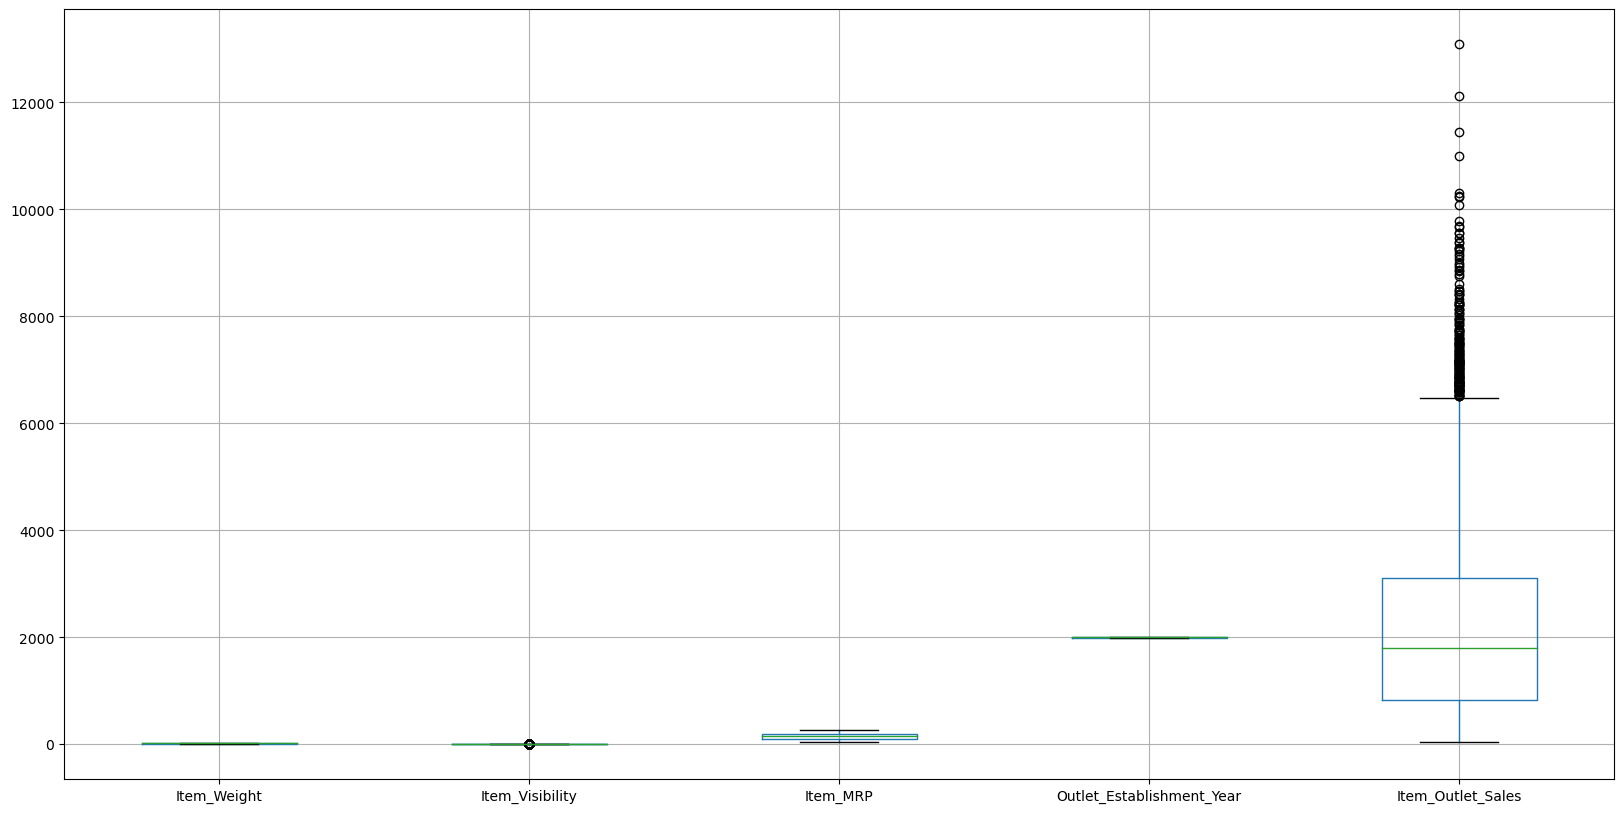

In [243]:
#checking for outliers
data.boxplot(figsize=(20,10))
plt.show()

In [246]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
df_outlier_removed=remove_outlier_IQR(data.Item_Outlet_Sales)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=data.drop([ind_diff[i]])
    data=df_final



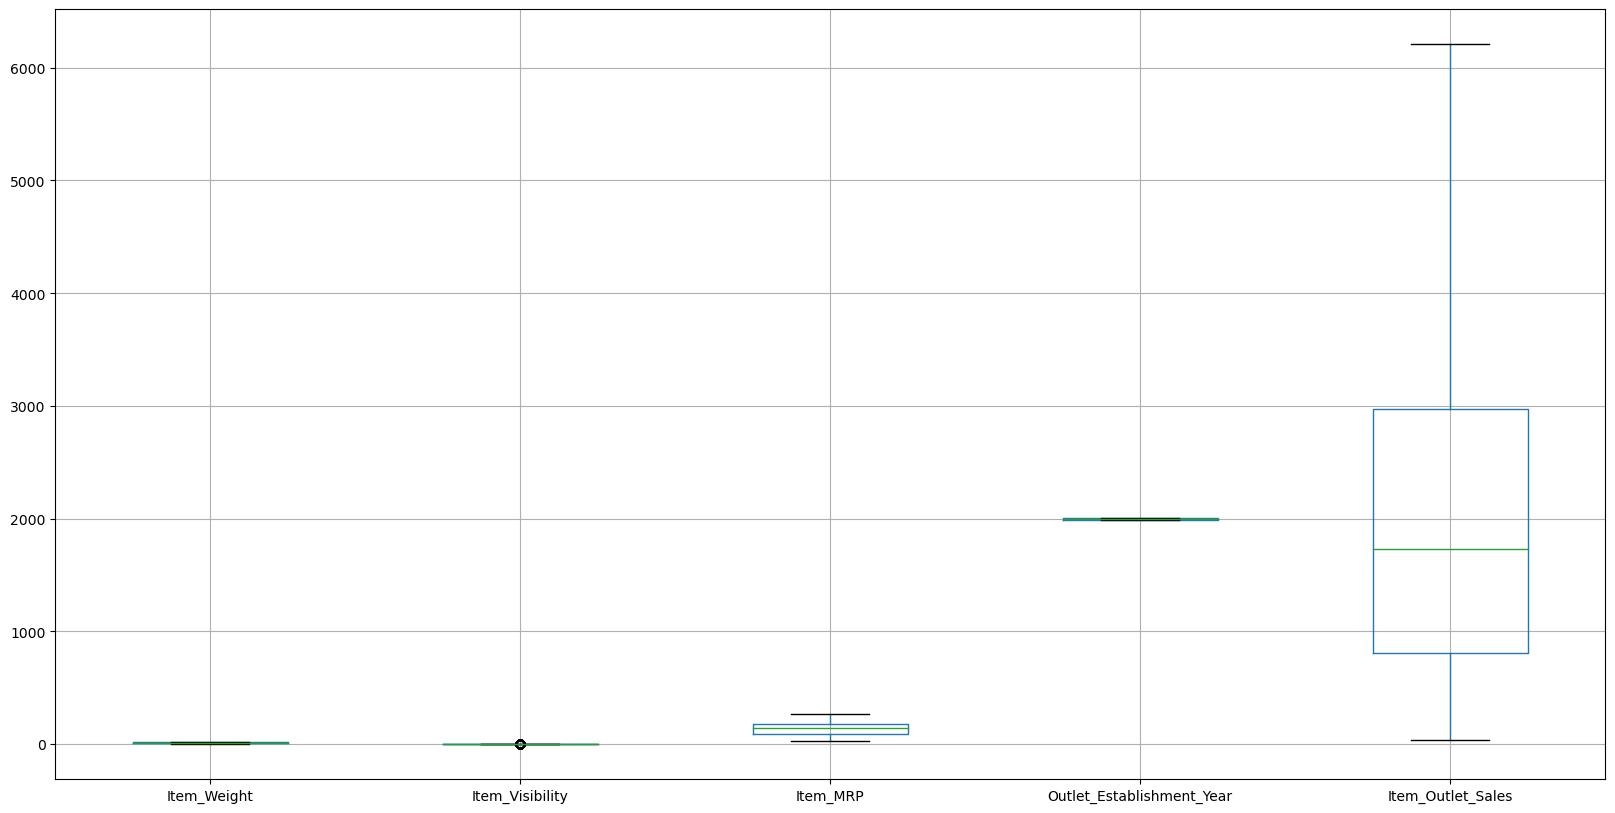

In [247]:
#checking for outliers
data.boxplot(figsize=(20,10))
plt.show()

In [250]:
df_outlier_removed=remove_outlier_IQR(data.Item_Visibility)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=data.drop([ind_diff[i]])
    data=df_final

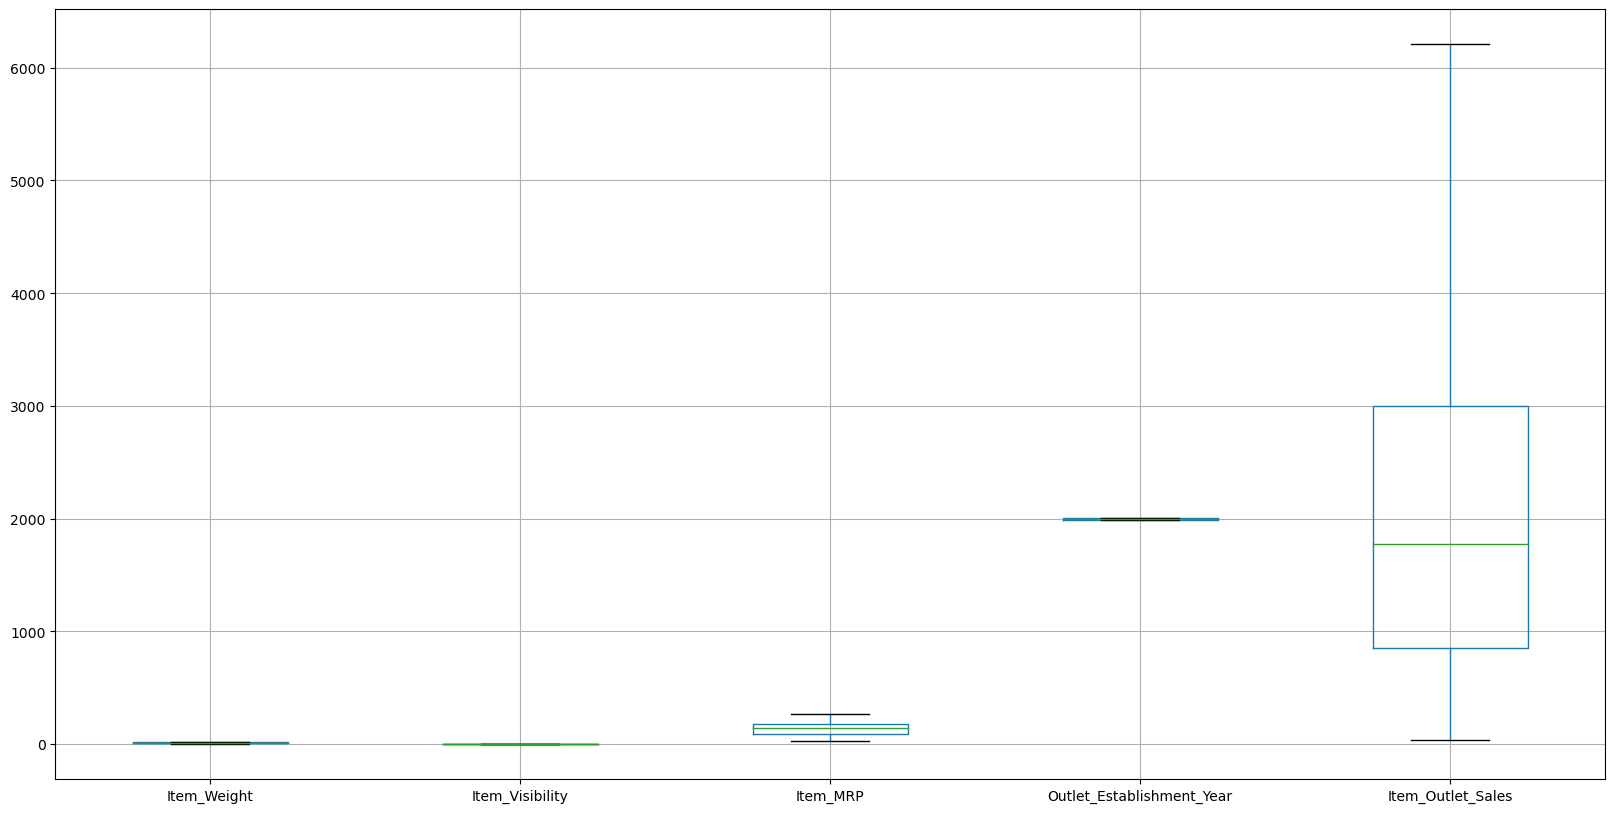

In [251]:
#checking for outliers
data.boxplot(figsize=(20,10))
plt.show()

In [178]:
data.shape

(8136, 12)

In [182]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1266
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2300
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [107]:
data.duplicated().sum()


0

In [252]:
data.Outlet_Size.value_counts()

Medium    2649
Small     2272
High       915
Name: Outlet_Size, dtype: int64

In [253]:
data['Outlet_Size']=data['Outlet_Size'].fillna('Medium')

In [254]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1266
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [195]:
data.shape

(5836, 12)

In [255]:
X = data.select_dtypes(include=[object])
X.drop(["Item_Fat_Content"],axis=1,inplace=True)

In [256]:

encoder = sklearn.preprocessing.LabelEncoder()
for col in set(X.columns):
    data[col] = encoder.fit_transform(data[col])

In [257]:
data.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [258]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,Regular,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,Low Fat,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,Regular,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,Low Fat,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [259]:
data.Item_Fat_Content.value_counts()

Low Fat    4865
Regular    2749
LF          302
reg         114
low fat     106
Name: Item_Fat_Content, dtype: int64

In [260]:
data.Outlet_Size.value_counts()

1    4949
2    2272
0     915
Name: Outlet_Size, dtype: int64

In [261]:
#encoding manually for person_home_ownership
data.Item_Fat_Content.replace({'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1},inplace=True)

In [262]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


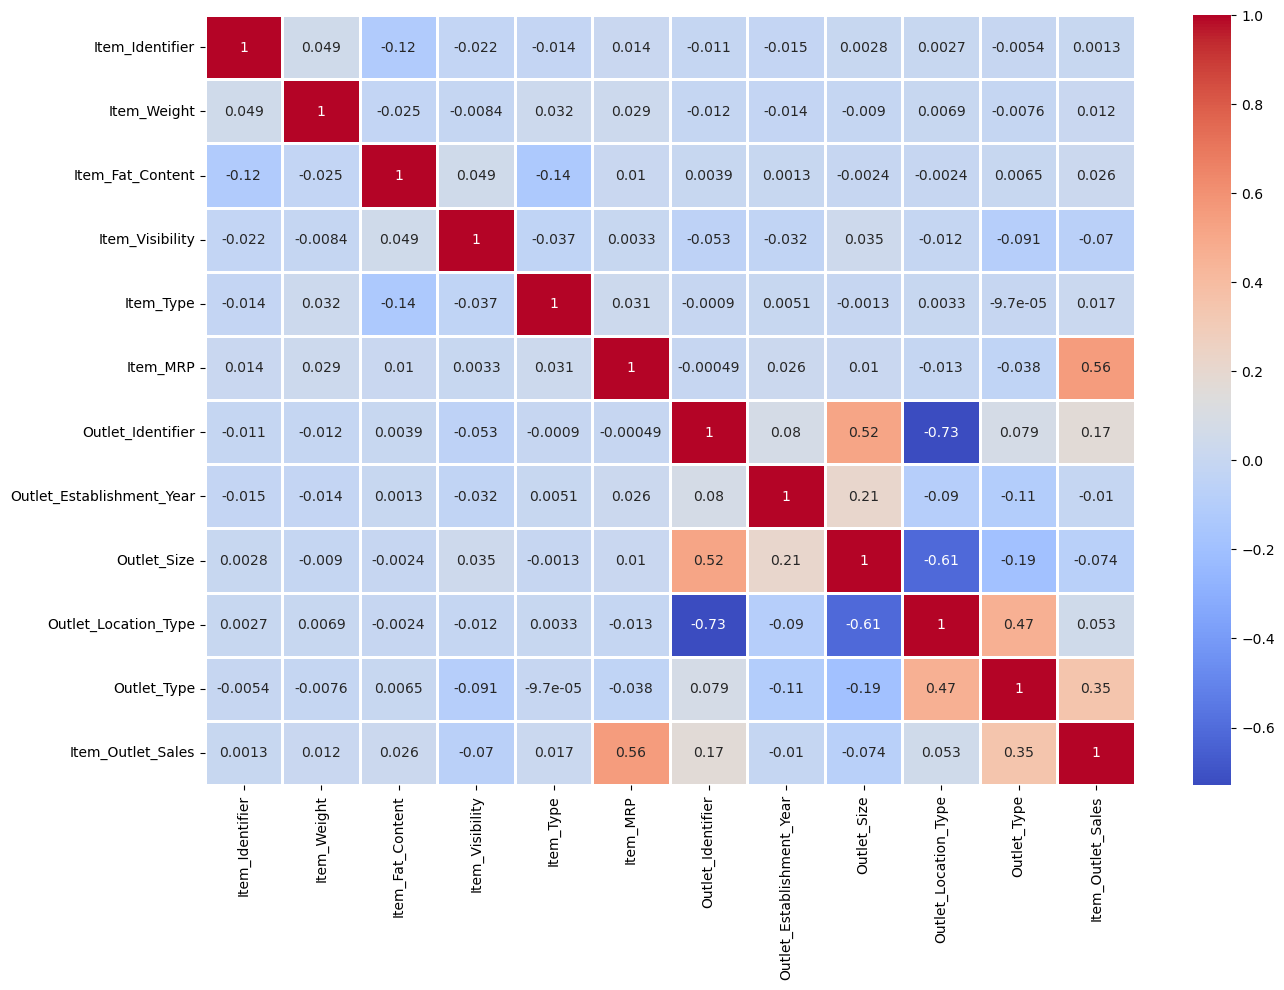

In [263]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)
plt.show()

In [264]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [265]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [266]:
columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
data.drop(columns=columns,axis=1,inplace=True)

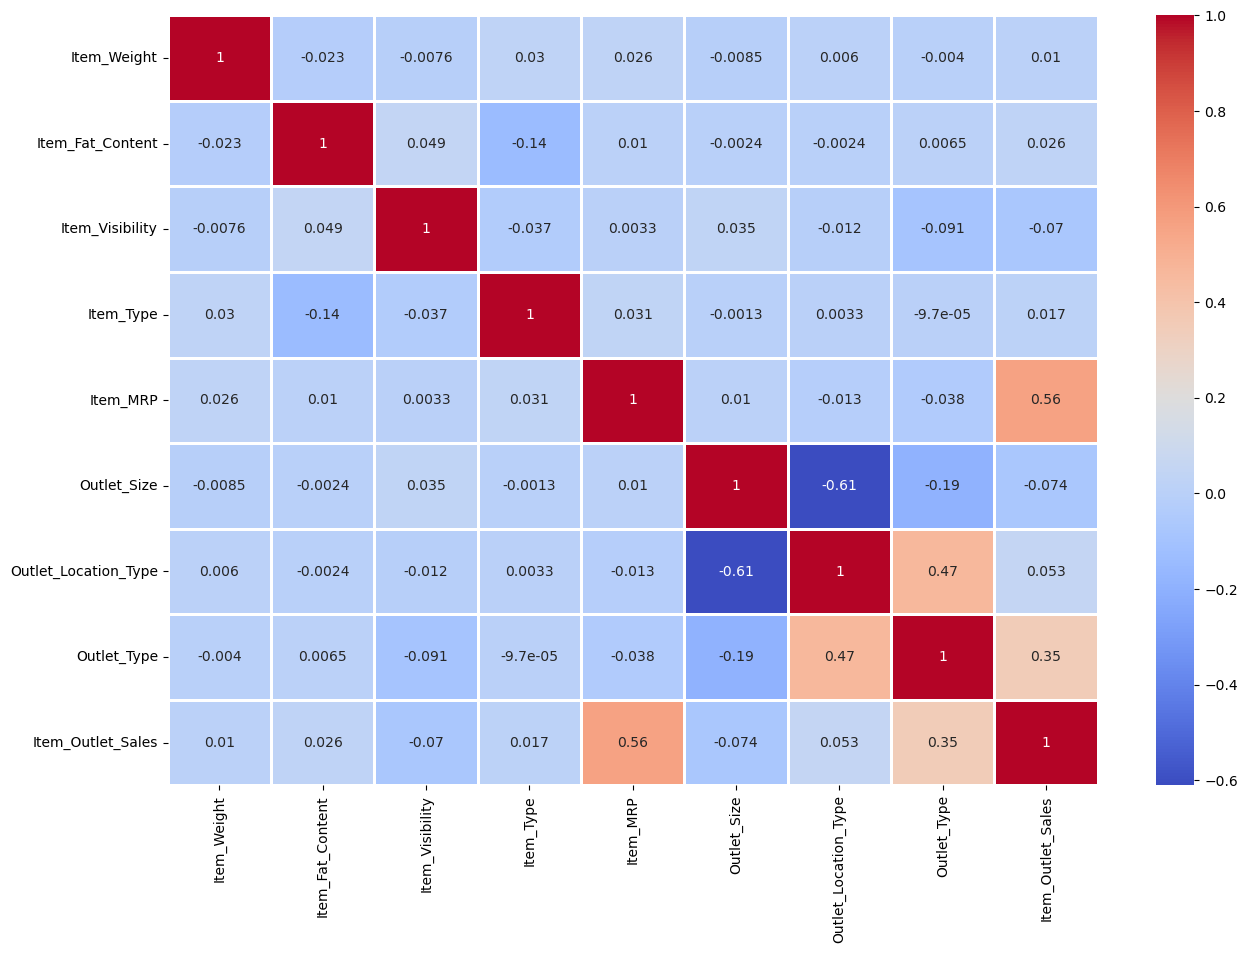

In [268]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)
plt.show()

In [217]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

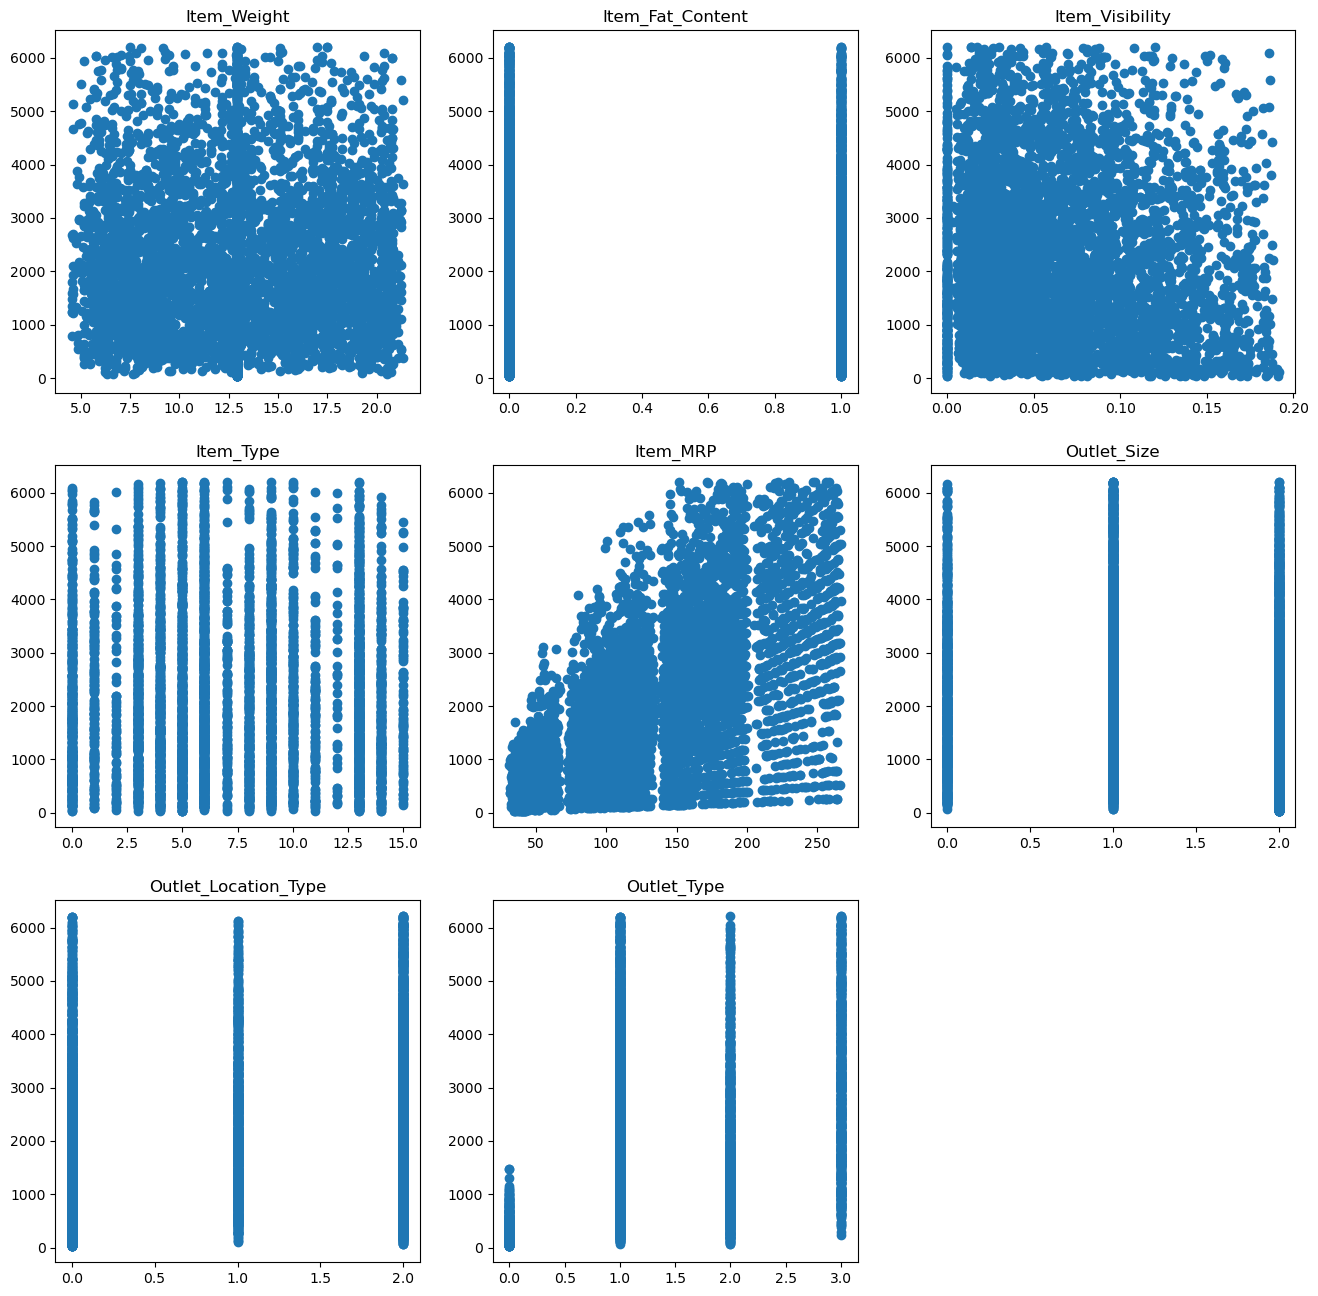

In [224]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plt.scatter(data.Item_Weight, data.Item_Outlet_Sales)
plt.title('Item_Weight')
plt.subplot(3,3,2)
plt.scatter(data.Item_Fat_Content, data.Item_Outlet_Sales)
plt.title('Item_Fat_Content')
plt.subplot(3,3,3)
plt.scatter(data.Item_Visibility, data.Item_Outlet_Sales)
plt.title('Item_Visibility')
plt.subplot(3,3,4)
plt.scatter(data.Item_Type, data.Item_Outlet_Sales)
plt.title('Item_Type')
plt.subplot(3,3,5)
plt.scatter(data.Item_MRP, data.Item_Outlet_Sales)
plt.title('Item_MRP')
plt.subplot(3,3,6)
plt.scatter(data.Outlet_Size, data.Item_Outlet_Sales)
plt.title('Outlet_Size')
plt.subplot(3,3,7)
plt.scatter(data.Outlet_Location_Type, data.Item_Outlet_Sales)
plt.title('Outlet_Location_Type')
plt.subplot(3,3,8)
plt.scatter(data.Outlet_Type, data.Item_Outlet_Sales)
plt.title('Outlet_Type')
plt.show()



In [269]:
X_sm=data.drop(['Item_Outlet_Sales'],axis=1)
y_sm=data['Item_Outlet_Sales']


In [270]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [272]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [295]:
steps = [
            ('poly'  , PolynomialFeatures(degree=4)),
            ('model' , LinearRegression())
       ]

linear_pipeline = Pipeline(steps)

In [296]:
linear_pipeline.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('model', LinearRegression())])

In [297]:
linear_pipeline.score(X_test, y_test)

0.5712005057053335

In [276]:
from sklearn.linear_model import Ridge

In [305]:
steps = [
            ('poly'  , PolynomialFeatures(degree=4)),
            ('model' , Ridge(alpha=10, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)


In [306]:
ridge_pipeline.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('model', Ridge(alpha=10))])

In [307]:
ridge_pipeline.score(X_test, y_test)

0.5712902461146605

In [314]:
from sklearn.ensemble import RandomForestRegressor
steps = [
            ('model' , RandomForestRegressor())
       ]
rfg_pipeline = Pipeline(steps)

In [315]:
rfg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('model', RandomForestRegressor())])

In [316]:
rfg_pipeline.score(X_test, y_test)

0.5284748718041051

In [323]:
!pip install xgboost

  Using cached xgboost-2.0.2-py3-none-win_amd64.whl (99.8 MB)


In [326]:
from xgboost import XGBRegressor

In [329]:
#grid search on xgboost 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create a based model
xgb = XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_



Fitting 3 folds for each of 315 candidates, totalling 945 fits


{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}

In [338]:
model=XGBRegressor(learning_rate= 0.05, max_depth= 2, n_estimators= 200)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [339]:
model.score(X_test, y_test)

0.5678157603638281